<a href="https://colab.research.google.com/github/Francisco-Italo/ml2023-Italo-Moraes/blob/master/Atividades/08-Metricas-de-Avaliacao/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print("Data:\n",X[:5])
print("Labels:\n",y[:5])

Data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels:
 [0 0 0 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_s = scl.fit_transform(X)

print(X_s[:5])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_s, y, train_size=0.1, random_state=42
)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15, 4)
(15,)
(135, 4)
(135,)


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42,solver='lbfgs').fit(X_train, y_train)
pred = clf.predict(X_test)

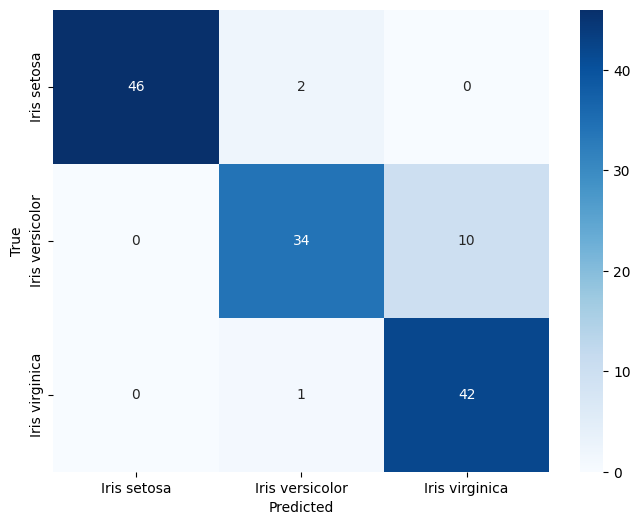

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Iris setosa', 'Iris versicolor', 'Iris virginica'], yticklabels=['Iris setosa', 'Iris versicolor', 'Iris virginica'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import numpy as np

accuracy = np.trace(cm) / np.sum(cm)

precision = cm[1, 1] / sum(cm[:, 1])

recall = cm[1, 1] / sum(cm[1, :])

f1_measure = 2 * (precision * recall) / (precision + recall)

print((f"Accuracy: {accuracy}\n================================="))
print((f"Precision: {precision}\n================================="))
print((f"Recall: {recall}\n================================="))
print((f"F1 measure: {f1_measure}"))

Accuracy: 0.9037037037037037
Precision: 0.918918918918919
Recall: 0.7727272727272727
F1 measure: 0.8395061728395061


In [ ]:
from sklearn import metrics

y_score = clf.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_score, multi_class='ovr')

0.9739653672919598

In [ ]:
y_score_virginica = y_score[:, 2]
y_test_virginica = np.where(y_test == 2, 1, 0)

auc_virginica = metrics.roc_auc_score(y_test_virginica, y_score_virginica)

print(auc_virginica)

0.9848331648129425


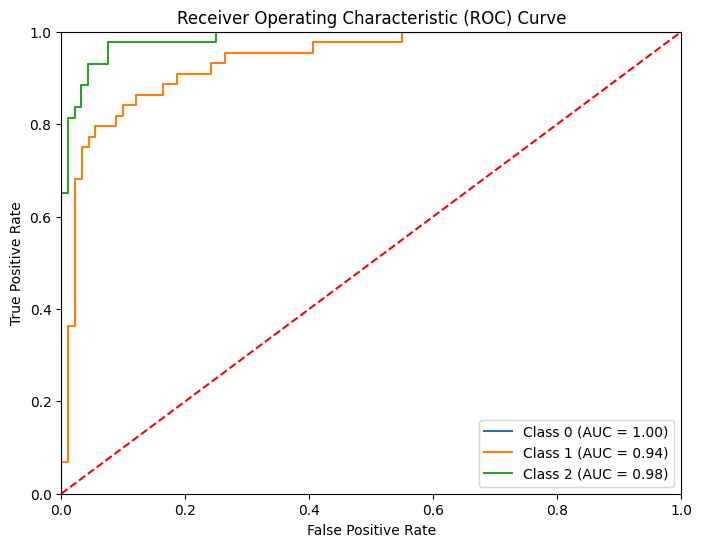

In [ ]:
num_classes = y_score.shape[1]
fpr_dict = {}
tpr_dict = {}
auc_dict = {}

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    y_true_binary = np.where(y_test == i, 1, 0)
    fpr, tpr, _ = metrics.roc_curve(y_true_binary, y_score[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
    auc_dict[i] = roc_auc
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()